# Intro al Open Gym de OpenAI

Opengym toolbox:
http://gym.openai.com/


Tutorial:
https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym

In [1]:
!apt install xvfb
!pip install pygame

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 x11-xkb-utils amd64 7.7+5 [158 kB]
Get:5 http://archive.ubuntu.com/ubunt

In [2]:
!pip install pyvirtualdisplay 
from pyvirtualdisplay import Display
Display("xvfb").start()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Para instalar el opengym si hiciera falta
#!pip install gym==0.21.0
import gym
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython import display

## Operaciones básicas en entornos

Leemos el entorno que queremos. Hay muchos entornos posibles, aquí seleccionamos el 'Taxi-v3'

In [20]:
env = gym.make("Taxi-v3", render_mode="rgb_array", new_step_api=True) # ansi


In [ ]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", new_step_api=True) # ansi


In [14]:
env = gym.make("Taxi-v3", render_mode="ansi") # 

In [21]:
env.reset()

422

In [22]:

env.render()

[array([[[110, 109, 106],
         [110, 109, 106],
         [124, 122, 122],
         ...,
         [108, 111, 109],
         [108, 111, 109],
         [118, 119, 119]],
 
        [[110, 109, 106],
         [110, 109, 106],
         [124, 122, 122],
         ...,
         [108, 111, 109],
         [108, 111, 109],
         [118, 119, 119]],
 
        [[114, 116, 115],
         [114, 116, 115],
         [126, 127, 126],
         ...,
         [112, 113, 111],
         [112, 113, 111],
         [118, 117, 115]],
 
        ...,
 
        [[116, 115, 116],
         [116, 115, 116],
         [106, 107, 108],
         ...,
         [113, 115, 114],
         [113, 115, 114],
         [117, 114, 117]],
 
        [[116, 115, 116],
         [116, 115, 116],
         [106, 107, 108],
         ...,
         [113, 115, 114],
         [113, 115, 114],
         [117, 114, 117]],
 
        [[115, 112, 112],
         [115, 112, 112],
         [119, 119, 117],
         ...,
         [123, 119, 118],
  

Para cerrar el entorno entorno

In [24]:
env.close()

Reseteamos el entorno

In [25]:
env.reset()

242

Ploteamos el entorno

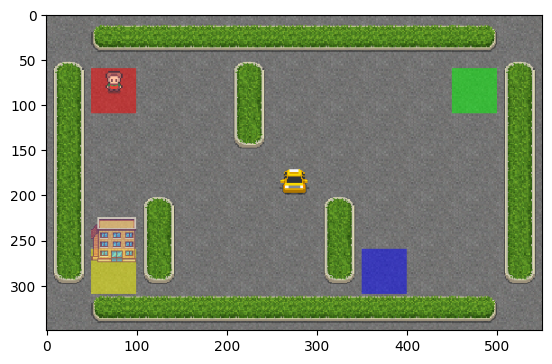

In [26]:
plt.imshow(env.render()[0])

El entorno es discreto, tiene un número de posibles estados finito. En este caso 500

In [27]:
env.observation_space

Discrete(500)

Ponemos un estado en particular (114)

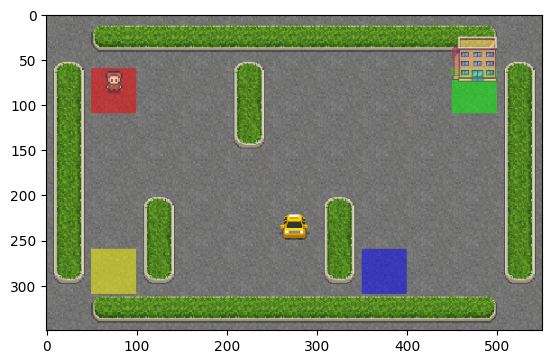

In [28]:
env.reset()
env.env.s = 114
plt.imshow(env.render()[0])

Cuantas posibles acciones tenemos

In [29]:
env.action_space.n

6

In [30]:
env.spec

EnvSpec(id='Taxi-v3', entry_point='gym.envs.toy_text.taxi:TaxiEnv', reward_threshold=8, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={'render_mode': 'rgb_array'}, namespace=None, name='Taxi', version=3)

In [ ]:
help(env.env)

Help on OrderEnforcing in module gym.wrappers.order_enforcing object:

class OrderEnforcing(gym.core.Wrapper)
 |  OrderEnforcing(env: gym.core.Env, disable_render_order_enforcing: bool = False)
 |  
 |  A wrapper that will produce an error if :meth:`step` is called before an initial :meth:`reset`.
 |  
 |  Example:
 |      >>> from gym.envs.classic_control import CartPoleEnv
 |      >>> env = CartPoleEnv()
 |      >>> env = OrderEnforcing(env)
 |      >>> env.step(0)
 |      ResetNeeded: Cannot call env.step() before calling env.reset()
 |      >>> env.render()
 |      ResetNeeded: Cannot call env.render() before calling env.reset()
 |      >>> env.reset()
 |      >>> env.render()
 |      >>> env.step(0)
 |  
 |  Method resolution order:
 |      OrderEnforcing
 |      gym.core.Wrapper
 |      gym.core.Env
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env: gym.core.Env, disable_render_order_enforcing: bool = False)
 |      A wrappe

## Moverse por el entorno

Moverse arriba

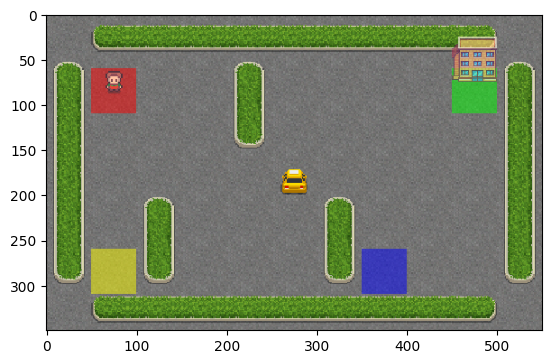

In [31]:
env.step(1)
plt.imshow(env.render()[0])


Cada vez que damos un paso, el entorno devuelve unos valores:
(state, reward, done, info)

In [32]:
env.step(1)

(141,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

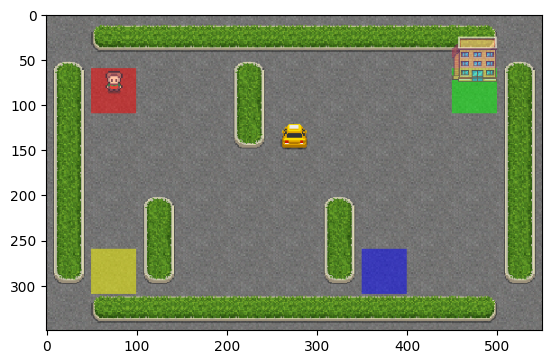

In [33]:
plt.imshow(env.render()[0])

Movimiento random

(141, -1, False, False, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})


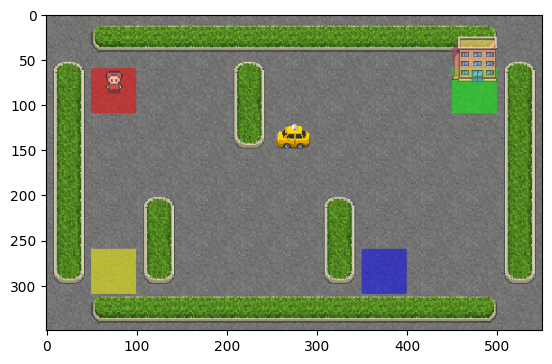

In [35]:
aa = env.step(env.action_space.sample())
print(aa)
plt.imshow(env.render()[0])

Acciones:

0) ABAJO. 
1) ARRIBA. 
2) DERECHA. 
3) IZQUIERDA. 
4) RECOGE. 
5) DEJA.

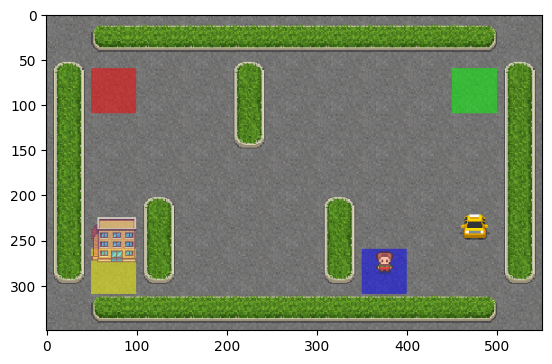

In [36]:

env.reset()
plt.imshow(env.render()[0])

Acciones:

0) ABAJO. 
1) ARRIBA. 
2) DERECHA. 
3) IZQUIERDA. 
4) RECOGE. 
5) DEJA.

Loop random movement

In [37]:

state = env.reset()
counter = 0
reward = -1
done = False
while done == False: #reward < 1 & counter<99000 & 
    state, reward, done, info, pp = env.step(env.action_space.sample())

    counter += 1
    print(reward,counter,done)
    #if aa[2] == True:
    #    state = env.reset()

imgs = env.render()

-1 1 False
-10 2 False
-10 3 False
-10 4 False
-10 5 False
-10 6 False
-1 7 False
-1 8 False
-1 9 False
-10 10 False
-10 11 False
-10 12 False
-1 13 False
-1 14 False
-10 15 False
-1 16 False
-1 17 False
-1 18 False
-1 19 False
-10 20 False
-1 21 False
-1 22 False
-10 23 False
-1 24 False
-1 25 False
-10 26 False
-1 27 False
-1 28 False
-10 29 False
-10 30 False
-1 31 False
-1 32 False
-10 33 False
-10 34 False
-1 35 False
-1 36 False
-1 37 False
-10 38 False
-1 39 False
-1 40 False
-1 41 False
-1 42 False
-1 43 False
-1 44 False
-1 45 False
-1 46 False
-10 47 False
-1 48 False
-1 49 False
-1 50 False
-1 51 False
-1 52 False
-1 53 False
-10 54 False
-1 55 False
-1 56 False
-10 57 False
-1 58 False
-1 59 False
-1 60 False
-1 61 False
-1 62 False
-1 63 False
-1 64 False
-10 65 False
-1 66 False
-1 67 False
-1 68 False
-10 69 False
-1 70 False
-1 71 False
-10 72 False
-1 73 False
-1 74 False
-10 75 False
-1 76 False
-10 77 False
-10 78 False
-10 79 False
-10 80 False
-1 81 False
-10 82 Fa

In [38]:
frames = [Image.fromarray(im) for im in imgs]
animation = frames[0]
animation.save("animation.gif", format="GIF", append_images=frames, save_all=True, duration=len(frames)*5)


In [39]:
display.Image('animation.gif')

Output hidden; open in https://colab.research.google.com to view.

Sin visualizar

In [40]:
env.env.s = 1
state = env.reset()
counter = 0
reward = -1
while reward < 0:
    state, reward, done, info, pp = env.step(env.action_space.sample())
    counter += 1
    #print(reward)
print(counter)

2138


In [41]:
reward

20

In [42]:
counter

2138

In [43]:
env.close()